# Potential Field

In this notebook you'll create a potential field by implementing and combining attractive and replusive forces. We can use the potential field to move in a direction closer to the goal (attraction) while avoiding obstacles (repulsion).

Recall from lecture that the attractive potential is:

$$F_{att} = \alpha * (x - x_{goal})$$

and repulsive potential, which is only computed when $d(x - x_{obs}) < Q_{max}$:

$$F_{rep} = \beta * (\frac{1}{Q_{max}} - \frac{1}{d(x - x_{obs})}) * \frac{1}{d(x - x_{obs})^2}$$

where $x_{goal}$ is the goal location, $x_{obs}$ is the obstacle location and $d(...)$ is the distance metric.

In [61]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

In [62]:
plt.rcParams['figure.figsize'] = 12, 12

In [63]:
def distanceMetric(p1, p2):
    temp = np.array(p1) - np.array(p2)
    sum_sq = np.dot(temp.T, temp)
    return (np.sqrt(sum_sq))

In [64]:
def attraction(position, goal, alpha):
    x = position[0]
    y = position[1]
    x_goal = goal[0]
    y_goal = goal[1]
    
    potential_x = alpha * (x - x_goal)
    potential_y = alpha * (y - y_goal)
    
    return (potential_x, potential_y)

In [65]:
def repulsion(position, obstacle, beta, q_max):
    position = np.array(position)
    obstacle = np.array(obstacle)
    return beta * ((1 / q_max) - (1 / np.linalg.norm(position - obstacle))) * (1 / np.linalg.norm(position - obstacle)**2)

Below we'll generate the potential field. For the purposes of the visualization we'll compute the field for the entire environment. Generally you'll only want to compute the field within a range around the current position for use in local planning.

In [66]:
def potential_field(grid, goal, alpha, beta, q_max):
    x = []
    y = []
    fx = []
    fy = []
    
    obs_i, obs_j = np.where(grid == 1)

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:
                
                # add attraction force
                force = attraction([i, j], goal, alpha)

                for (oi, oj) in zip(obs_i, obs_j):
                    if np.linalg.norm(np.array([i, j]) - np.array([oi, oj])) < q_max:
                        # add replusion force
                        force += repulsion([i, j], [oi, oj], beta, q_max)
                    
                x.append(i)
                y.append(j)
                fx.append(force[0])
                fy.append(force[1])

    return x, y, fx, fy

In [67]:
# generate environment
grid = np.zeros((30, 30))
grid[10:15,10:15] = 1.0
grid[17:25,10:17] = 1.0

goal  = [5, 5]

# constants
alpha = 1.0
beta = 10.0
q_max = 2

Generating the potential field.

In [68]:
x, y, fx, fy = potential_field(grid, goal, alpha, beta, q_max)

Plotting the field. 

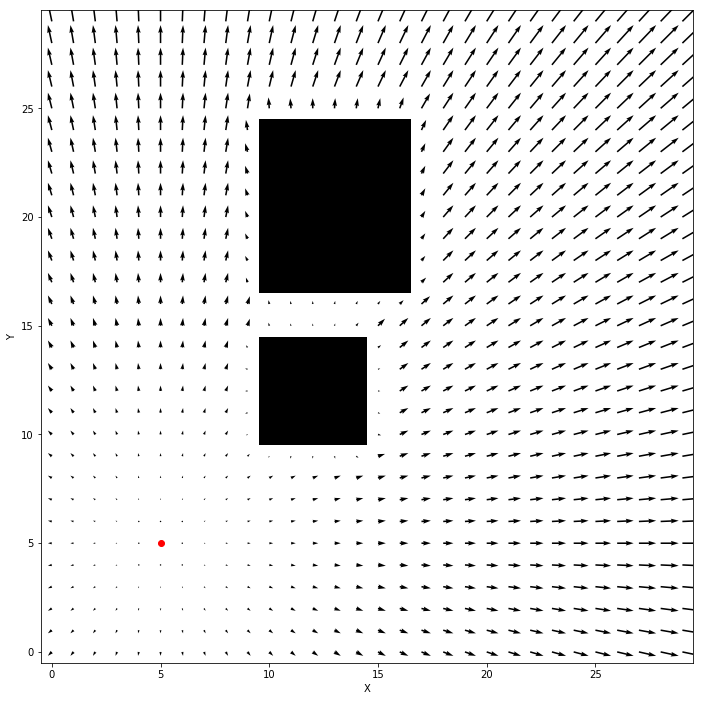

In [69]:
plt.imshow(grid, cmap = 'Greys', origin='lower')
plt.plot(goal[1], goal[0], 'ro')
plt.quiver(y, x, fy, fx)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[Solution](./Potential-Field-Solution.ipynb)